<a href="https://colab.research.google.com/github/parvvaresh/resume-classification/blob/main/resume_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.stem import *
from nltk.stem.porter import *
from matplotlib.gridspec import GridSpec
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2


import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount('/content/drive')

from google.colab import output
output.clear()

#add data and see it

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/test/resume_dataset.csv", encoding="utf-8")

df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


#type of Category

In [ ]:
print("Category of resume : ")
for index, cat_name in enumerate(df["Category"].unique()):
  print(f"{index + 1} ----> {cat_name}")

Category of resume : 
1 ----> Data Science
2 ----> HR
3 ----> Advocate
4 ----> Arts
5 ----> Web Designing
6 ----> Mechanical Engineer
7 ----> Sales
8 ----> Health and fitness
9 ----> Civil Engineer
10 ----> Java Developer
11 ----> Business Analyst
12 ----> SAP Developer
13 ----> Automation Testing
14 ----> Electrical Engineering
15 ----> Operations Manager
16 ----> Python Developer
17 ----> DevOps Engineer
18 ----> Network Security Engineer
19 ----> PMO
20 ----> Database
21 ----> Hadoop
22 ----> ETL Developer
23 ----> DotNet Developer
24 ----> Blockchain
25 ----> Testing


#frequency of Category

In [ ]:
def counter(temp):
  result = dict()
  for element in temp:
    if element in result:
      result[element] += 1
    else:
      result[element] = 1
  return result

count_category = counter(df["Category"])

print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
for name, count in count_category.items():
  print(f"{name} ----> {count}")

Displaying the distinct categories of resume and the number of records belonging to each category -
Data Science ----> 10
HR ----> 11
Advocate ----> 10
Arts ----> 6
Web Designing ----> 5
Mechanical Engineer ----> 5
Sales ----> 5
Health and fitness ----> 6
Civil Engineer ----> 6
Java Developer ----> 14
Business Analyst ----> 6
SAP Developer ----> 6
Automation Testing ----> 7
Electrical Engineering ----> 5
Operations Manager ----> 4
Python Developer ----> 6
DevOps Engineer ----> 7
Network Security Engineer ----> 5
PMO ----> 3
Database ----> 11
Hadoop ----> 7
ETL Developer ----> 5
DotNet Developer ----> 7
Blockchain ----> 5
Testing ----> 7


#plot of frequency of Category 1

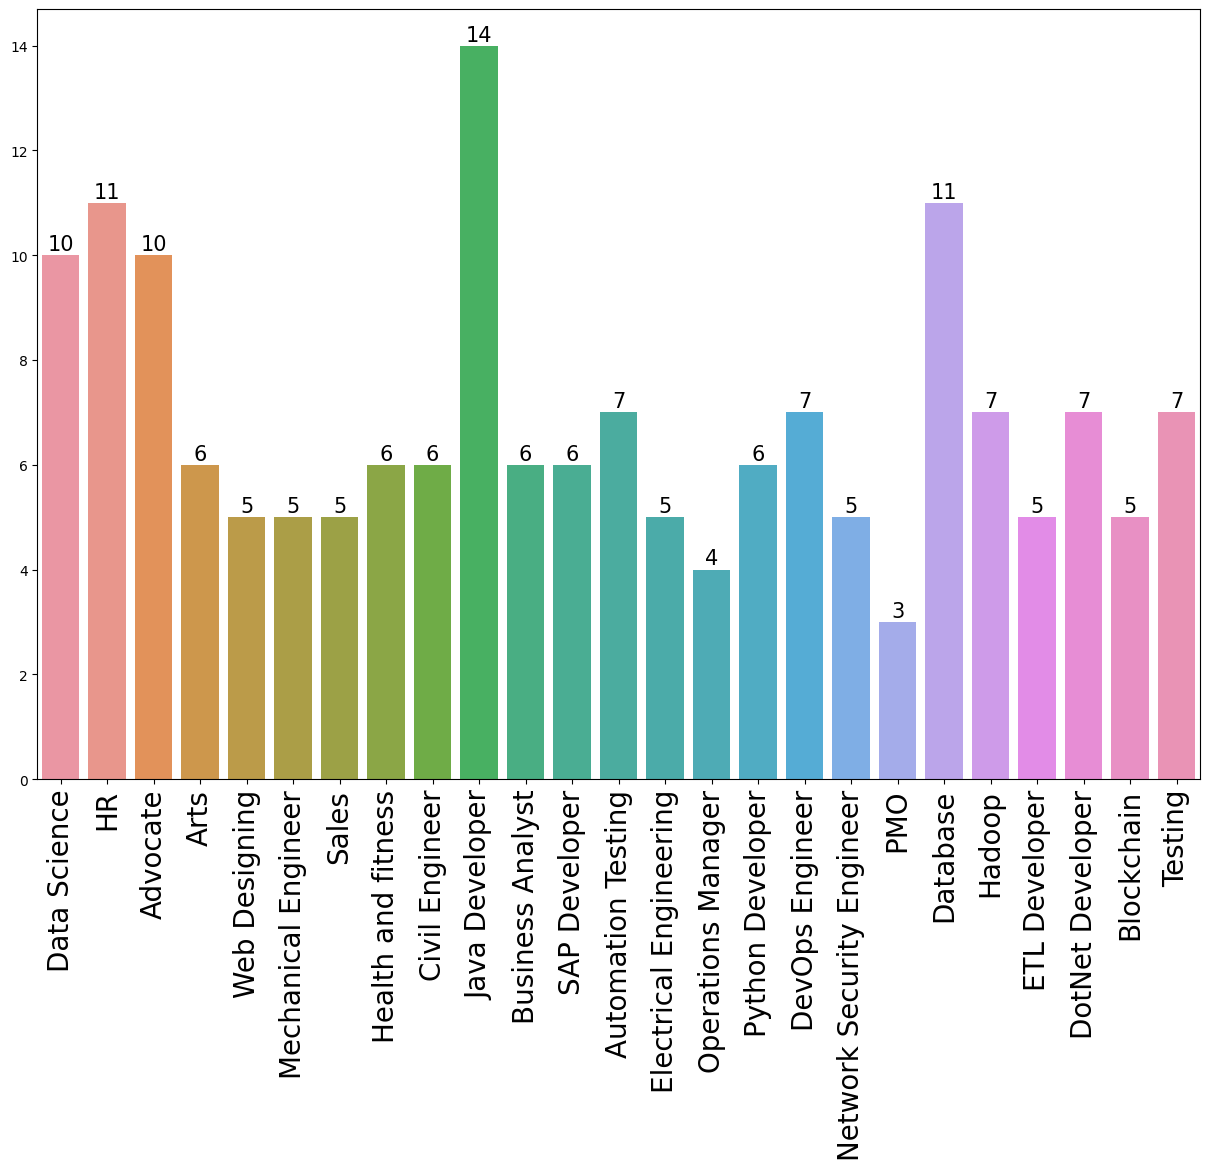

In [ ]:
plt.figure(figsize = (15 , 10))
plots = sns.barplot(x = list(count_category.keys()) , y = list(count_category.values()))
plots.set_xticklabels(plots.get_xticklabels(),rotation = 90)
plots.xaxis.set_tick_params(labelsize=20)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

#plot of frequency of Category 2

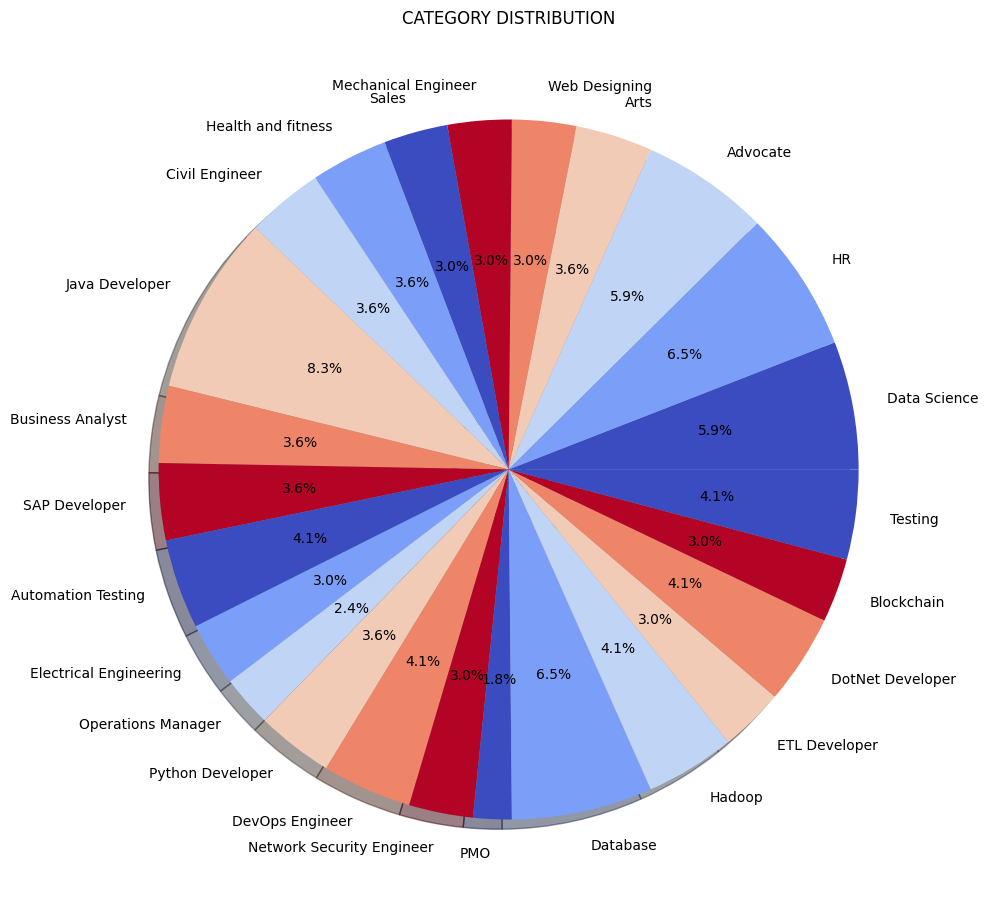

In [ ]:
targetCounts = list(count_category.values())
targetLabels  = list(count_category.keys())
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

#pre process


such as  :


*   remove punctuations
*   remove stopwords
*   tokenize
*   Stemmer
*   clean text

In [ ]:
class pre_process:
  def __init__(self):
    self.stopwords = set(stopwords.words('english')+['``',"''"])
    self.punctuations_list = string.punctuation


  def fit(self ,df, col):
    df[col] = df[col].apply(self._remove_punctuations)
    df[col] = df[col].apply(self._cleanResume)
    df[col] = df[col].apply(self._token)
    df[col] = df[col].apply(self._remove_stopwords)
    df[col] = df[col].apply(self._stem)
    df[col] = df[col].apply(self._remove_stopwords)

    return df



  def _remove_punctuations(self, text):
    translator = str.maketrans('', '', self.punctuations_list)
    return text.translate(translator)

  def _cleanResume(self, text):
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+', '', text)
    text = re.sub('@\S+', '  ', text)
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'[0-9]+', '', text)
    return text

  def _token(self, text):
    return text.split()

  def _remove_stopwords(self, words):
    return [word for word in words if word not in self.stopwords]

  def _stem(self, words):
    result = set()
    stemmer = PorterStemmer()
    for word in words:
      result.add(stemmer.stem(word))
    return list(result)

In [ ]:
pp = pre_process()
df = pp.fit(df, "Resume")
df.head(4)


,Category,Resume
0,Data Science,"[neg, decis, pars, vehicl, skill, investig, pu..."
1,Data Science,"[detect, scientist, behind, work, detail, mate..."
2,Data Science,"[bangalor, skill, softwar, littl, analysi, dee..."
3,Data Science,"[ess, transfer, segment, prepar, reus, infer, ..."


#plot of frequency of word

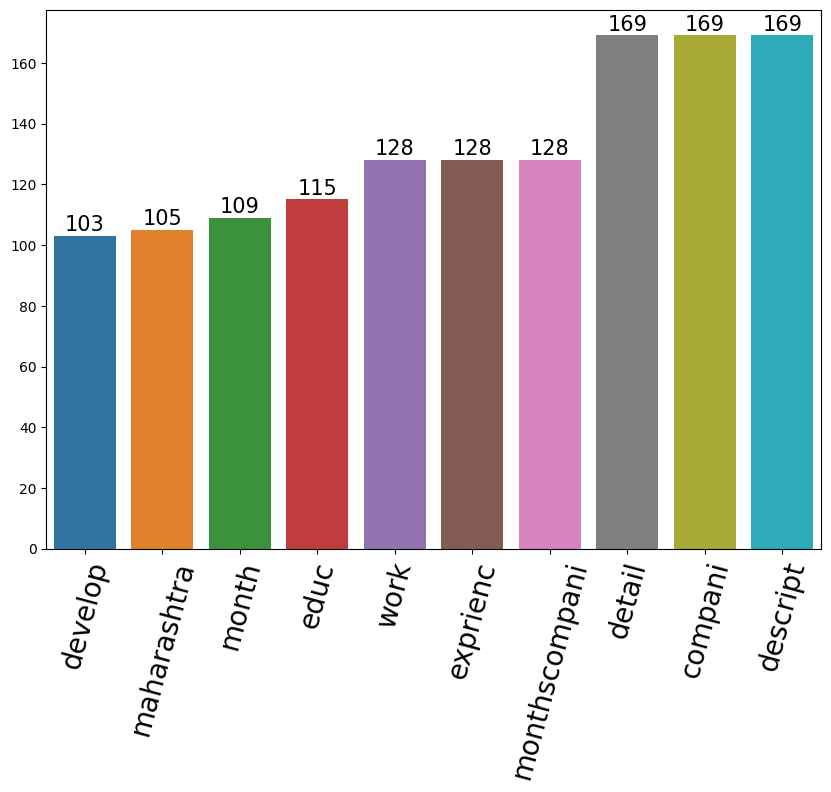

In [ ]:
all_words = list()
for words in df["Resume"]:
  all_words.extend(words)

counter_words = counter(all_words)
counter_words = dict(sorted(counter_words.items(), key=lambda item:item[1]))

plt.figure(figsize = (10 , 7))
plots = sns.barplot(x = list(counter_words.keys())[-10 : ] , y = list(counter_words.values())[-10 : ])
plots.set_xticklabels(plots.get_xticklabels(),rotation = 75)
plots.xaxis.set_tick_params(labelsize=20)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

#wordcloude

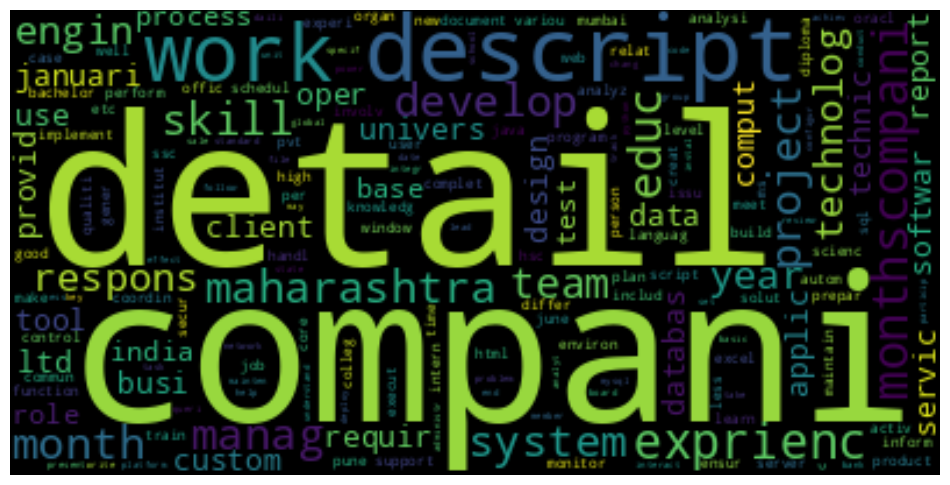

In [ ]:
plt.figure(figsize = (12 , 9))
text = " ".join(all_words)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#label encoder

##Implementation

In [ ]:
class labelEncoder:
  def __init__(self):
    pass

  def fit(self, df, col):
    labels = df[col].unique()
    self.transforme = dict()

    for index in range(0 , len(labels)):
      self.transforme.update({labels[index] : index})
    labels_transforme = list()

    for label in df[col]:
      labels_transforme.append(self.transforme[label])

    df[col] = labels_transforme
    return df

  def get_transforme(self):
    return  self.transforme

##aplly to data

In [ ]:
le = labelEncoder()
df = le.fit(df, "Category")
df.head()

,Category,Resume
0,0,"[neg, decis, pars, vehicl, skill, investig, pu..."
1,0,"[detect, scientist, behind, work, detail, mate..."
2,0,"[bangalor, skill, softwar, littl, analysi, dee..."
3,0,"[ess, transfer, segment, prepar, reus, infer, ..."
4,0,"[ymcaust, databas, internshipskil, haryanadata..."


In [ ]:
y = df["Category"].values
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22,
       22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24])

#vectorize



*   tf-idf
*   freq-word



##tf-idf

##Implementation

In [ ]:
from math import log
class tf_idf:
  def __init__(self):
    pass

  def fit(self, df, col):
    self.ducs = list(df[col])
    self.all_words = self.collet_words(self.ducs)
    self.tf = self._Tf(self.ducs, self.all_words)
    self.idf = self._Idf(self.ducs, self.all_words)
    self.tf_idf = self._Tf_Idf(self.idf, self.tf)
    return self.tf_idf

  def _Tf(self, ducs, words):
    _tf = pd.DataFrame()
    _tf["Words"] = words

    for index, duc in enumerate(ducs):
      name_col = f"Resume - {index + 1}"
      val_col = []
      for word in _tf["Words"]:
        val_col.append(duc.count(word) / len(duc))
      _tf[name_col] = val_col
    _tf = _tf.set_index("Words")
    return _tf

  def _Idf(self, ducs, words):
    _idf = pd.DataFrame()
    _idf["Words"] = words
    values = []
    for word in _idf["Words"]:
      counter = 0
      for duc in ducs:
        if word in duc:
          counter += 1
      values.append(log(len(ducs) / counter , 2))

    _idf["IDF - VALUE"] = values
    _idf = _idf.set_index("Words")
    return _idf

  def _Tf_Idf(self, idf, tf):
    result = tf.copy()
    name_cols = list(tf.columns)
    idf_value = idf["IDF - VALUE"]
    for col in name_cols:
      tf_value = tf[col]
      result[col] = idf_value * tf_value
      result[col] = result[col].apply(lambda number : round(number, 2))
    result = result.T
    return np.array(result)

  def collet_words(self, ducs):
    words = []
    for element in ducs:
      words.extend(element)
    return list(set(words))

##apply to data

In [ ]:
t_i = tf_idf()
tf_idf_x = t_i.fit(df, "Resume")
tf_idf_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tf_idf_x.shape

(169, 5885)

#select best feature

In [ ]:
transformer = SelectKBest(chi2, k = 250).fit(tf_idf_x, y)
tf_idf_x = transformer.transform(tf_idf_x)
tf_idf_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tf_idf_x.shape

(169, 250)

##split to test and train

In [ ]:
tf_idf_x_train, tf_idf_x_test, tf_idf_y_train, tf_idf_y_test = train_test_split(tf_idf_x, y,random_state=0, test_size=0.2)

##freq_word

##Implementation

In [ ]:
class freq_word:
  def __init__(self, data, words_col, target_col):
    self.data = data
    self.words_col = words_col
    self.target_col = target_col
    self.targets = data[self.target_col].unique()
    self.words = self.get_words(self.data[self.words_col])

    self.counter = self.create_counter()

  def transform(self):
    val = []
    for index in range(0 , self.data.shape[0]):
      words = self.data.iloc[index][self.words_col]
      target = self.data.iloc[index][self.target_col]
      for word in words:
        count_target = self.counter[word].copy()
        count_target[target] += 1
        self.counter[word] = count_target

    for key in self.counter:
        count_target = self.counter[key].copy()
        count = list(count_target.values())
        self.counter[key] = np.array(count)


    for index in range(0 , self.data.shape[0]):
      words = self.data.iloc[index][self.words_col]
      x = 0
      for word in words:
        count_target = self.counter[word].copy()
        x += count_target
      val.append(x)
    return np.array(val)

  def create_counter(self):
    count_targets = dict()
    for target in self.targets:
      count_targets[target] = 0

    counter = dict()
    for word in self.words:
      temp = count_targets.copy()
      counter[word] = temp
    return counter



  def get_words(self, all_words):
    words = []
    for element in all_words:
      words.extend(element)
    return list(set(words))

##apply to data

In [ ]:
fw = freq_word(df, "Resume", "Category")
freq_word_x = fw.transform()
freq_word_x

array([[706, 127, 127, ..., 255, 185, 173],
       [260,  78,  83, ...,  84,  65,  68],
       [368, 113,  97, ..., 148, 114, 120],
       ...,
       [216,  94, 116, ..., 119,  92, 314],
       [148, 104,  96, ..., 117,  87, 165],
       [219, 104,  99, ..., 174, 130, 219]])

In [ ]:
freq_word_x.shape

(169, 25)

##split to test and train

In [ ]:
freq_word_x_train, freq_word_x_test, freq_word_y_train, freq_word_y_test = train_test_split(freq_word_x, y,random_state=0, test_size=0.2)

#         classifiction  Category

#KNN

##Implementation

In [ ]:
class knn:
  def __init__(self):
    self.k = None

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, x_test, k):
    self.k = k
    y_pred = [self._predict(x, k) for x in x_test]
    return np.array(y_pred)

  def _predict(self, x, k):
    euclidean_distance = [self._euclidean_distance(x_train, x) for x_train in self.X_train]
    index_sort = np.argsort(euclidean_distance)[ : self.k]
    labels = [self.y_train[index] for index in index_sort]
    return self.get_most_label(labels)

  def get_most_label(self, labels):
    counter = {}
    for label in labels:
      if label in counter:
        counter[label] += 1
      else:
        counter[label] = 1
    return max(counter.items() , key=lambda item : item[1])[0]

  def _euclidean_distance(self, x_1, x_2):
    return np.sqrt(np.sum((x_1 - x_2) ** 2))

  def accuracy(self, y, y_predict):
    return np.sum(y == y_predict) / len(y)

##for tf-idf

In [ ]:
KNN_tf_idf = knn()
KNN_tf_idf.fit(tf_idf_x_train, tf_idf_y_train)
y_pred = KNN_tf_idf.predict(tf_idf_x_test, 3)
acc_knn = KNN_tf_idf.accuracy(y_pred, tf_idf_y_test)

f"accuracy of knn for tf-idf vec is {acc_knn}"

'accuracy of knn for tf-idf vec is 0.7352941176470589'

##for freq word

In [ ]:
KNN_freq_word = knn()
KNN_freq_word.fit(freq_word_x_train, freq_word_y_train)
y_pred = KNN_freq_word.predict(freq_word_x_test, 3)
acc_knn = KNN_freq_word.accuracy(y_pred, freq_word_y_test)

f"accuracy of knn for freq-word vec is {acc_knn}"

'accuracy of knn for freq-word vec is 0.6470588235294118'

#naive_bayes

##Implementation

In [ ]:
class naive_bayes:
  def __init__(self):
    pass

  def fit(self, x, y):
    self.m, self.n = x.shape
    self._classes = np.unique(y)
    self._mean = np.zeros((self._classes.shape[0], self.n))
    self._var = np.zeros((self._classes.shape[0], self.n))
    self._y_possibilities = np.zeros(self._classes.shape[0])

    for index , Class in enumerate(self._classes):
      class_temp = x[y == Class]
      self._mean[index, : ] = np.mean(class_temp, axis = 0)
      self._var[index, : ] = np.var(class_temp, axis = 0)
      self._y_possibilities[index] = class_temp.shape[0] / self.m


  def predict(self, X):
    y_predict = [self._predict(x) for x in X]
    return np.array(y_predict)

  def _predict(self, point):
    result = []
    for index in range(self._classes.shape[0]):
      y_possibility = self._y_possibilities[index]
      p_x_y = self._p_x_y(point, index)
      possibility = y_possibility * p_x_y
      result.append(possibility)
    index_max = result.index(max(result))
    return self._classes[index_max]

  def _p_x_y(self, point, index):
    mean = self._mean[index]
    var = self._var[index]
    denominator = np.sqrt(2 * np.pi * var)
    numerator = np.exp(-((point - mean) ** 2) / (2 * var))

    result = 1
    for p in (numerator / denominator):
      result *= p
    return result

  def accuracy(self, y, y_predict):
    return np.sum(y == y_predict) / y.shape[0]

##for tf-idf

In [ ]:
nb_tf_idf = naive_bayes()
nb_tf_idf.fit(tf_idf_x_train, tf_idf_y_train)
y_pred = nb_tf_idf.predict(tf_idf_x_test)
acc_nb = nb_tf_idf.accuracy(y_pred, tf_idf_y_test)

f"accuracy of naive bayes for tf-idf vec is {acc_nb}"

'accuracy of naive bayes for tf-idf vec is 0.08823529411764706'

##for freq word

In [ ]:
nb_freq_word = naive_bayes()
nb_freq_word.fit(freq_word_x_train, freq_word_y_train)
y_pred = nb_freq_word.predict(freq_word_x_test)
acc_nb = nb_freq_word.accuracy(y_pred, freq_word_y_test)

f"accuracy of naive bayes for feq-word vec is {acc_nb}"

'accuracy of naive bayes for feq-word vec is 0.29411764705882354'

#decision tree

##Implementation

In [ ]:
class Node:
  def __init__(self, feature = None, threshold = None, left = None, right = None, value = None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def is_leaf(self):
    return self.value is not None

class decision_tree:
  def __init__(self, min_samples_split = 2, max_depth = 100, n_feats = None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats

    self.root = None

  def fit(self, x, y):
    self.n_feats = x.shape[1] if not self.n_feats else min(x.shape[1] , self.n_feats)
    self.root = self._grow_tree(x, y)

  def _grow_tree(self, x, y, depth = 0):
    n_samples , n_feature = x.shape
    n_labels = len(np.unique(y))

    if (depth >= self.max_depth) or (n_labels == 1) or (n_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return Node(value = leaf_value)

    features_index = np.random.choice(n_feature, self.n_feats, replace=False)
    best_feature, best_threshold = self._best_split(x, y, features_index)
    left_index , right_index = self._split(x[ : , best_feature], best_threshold)

    left_child = self._grow_tree(x[left_index, : ], y[left_index] , depth + 1)
    right_child = self._grow_tree(x[right_index, : ], y[right_index] , depth + 1)
    return Node(best_feature, best_threshold, left_child, right_child)



  def _best_split(self, x, y, features_index):
    best_gain = -1
    best_feature_index , best_threshold = None, None

    for feature_index in features_index:
      x_column = x[ : , feature_index]
      thresholds = np.unique(x_column)
      for threshold in thresholds:
        gain = self._information_gain(y, x_column, threshold)
        if gain > best_gain:
          best_gain = gain
          best_feature_index = feature_index
          best_threshold = threshold

    return best_feature_index, best_threshold

  def _information_gain(self, y,  x_column, threshold):
    entropy_parents = self._entropy(y)

    left_index, right_index = self._split(x_column, threshold)

    if len(left_index) == 0 or len(right_index) == 0:
      return 0

    n_all , n_left , n_right = len(y),  len(left_index) ,  len(right_index)
    entropy_left , entropy_right = self._entropy(y[left_index]) , self._entropy(y[right_index])

    entropy_childerns = ((n_left / n_all) * entropy_left) + ((n_right / n_all) * entropy_right)
    information_gain = entropy_parents - entropy_childerns
    return information_gain

  def _split(self, x, threshold):
    left_index = np.argwhere(x <= threshold).flatten()
    right_index = np.argwhere(x > threshold).flatten()
    return left_index, right_index

  def _entropy(self, y):
    counter = dict()
    for label in y:
      if label in counter:
        counter[label] += 1
      else:
        counter[label] = 1

    ps = np.array(list(counter.values())) / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

  def _most_common_label(self, y):
    counter = dict()
    for label in y:
      if label in counter:
        counter[label] += 1
      else:
        counter[label] = 1
    counter = dict(sorted(counter.items() , key=lambda  item : item[1]))
    most_common = list(counter.keys())[-1]
    return most_common

  def predict(self, x):
    return np.array([self._traverse_tree(point, self.root) for point in x])

  def _traverse_tree(self, x, node):
    if node.is_leaf():
      return node.value

    if x[node.feature] <= node.threshold:
      return self._traverse_tree(x, node.left)
    return self._traverse_tree(x, node.right)

  def accuracy(self, y_test, y_pred):
     accu = np.sum(y_test == y_pred) / len(y_test)
     return accu

##for tf-idf

In [ ]:
dt_tf_idf = decision_tree(max_depth = 10)
dt_tf_idf.fit(tf_idf_x_train, tf_idf_y_train)
y_pred = dt_tf_idf.predict(tf_idf_x_test)
acc_dt = dt_tf_idf.accuracy(y_pred, tf_idf_y_test)

f"accuracy of decision tree for tf-idf vec is {acc_dt}"

'accuracy of decision tree for tf-idf vec is 0.3235294117647059'

##for freq word

In [ ]:
dt_freq_word = decision_tree(max_depth = 10)
dt_freq_word.fit(freq_word_x_train, freq_word_y_train)
y_pred = dt_freq_word.predict(freq_word_x_test)
acc_dt = dt_freq_word.accuracy(y_pred, freq_word_y_test)

f"accuracy of decision tree for freq-word vec is {acc_dt}"

'accuracy of decision tree for freq-word vec is 0.2647058823529412'

#random forest

##Implementation

In [ ]:
class random_forest:
  def __init__(self, n_trees = 10, min_samples_split = 2, max_depth = 100, n_feats = None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.n_trees = n_trees

  def _bootstrap(self, x, y):
    n_samples = x.shape[0]
    rand_index = np.random.choice(n_samples, n_samples, replace=True)
    return x[rand_index] , y[rand_index]

  def fit(self, x, y):
    self.trees = list()
    for _ in range(0, self.n_trees):
      tree = decision_tree(min_samples_split = self.min_samples_split , max_depth = self.max_depth, n_feats = self.n_feats)
      tree.fit(x, y)
      self.trees.append(tree)

  def predict(self, x):
    tree_preds = [tree.predict(x) for tree in self.trees]
    tree_preds = np.swapaxes(tree_preds, 0, 1)
    y_pred = [self._most_common_label(tree_pred) for tree_pred in tree_preds]
    return np.array(y_pred)


  def _most_common_label(self, y):
    counter = dict()
    for label in y:
      if label in counter:
        counter[label] += 1
      else:
        counter[label] = 1
    counter = dict(sorted(counter.items() , key=lambda  item : item[1]))
    most_common = list(counter.keys())[-1]
    return most_common



  def accuracy(self, y_test, y_pred):
     accu = np.sum(y_test == y_pred) / len(y_test)
     return accu

##for tf-idf



In [ ]:
rf_tf_idf = random_forest(n_trees = 5, max_depth = 10)
rf_tf_idf.fit(tf_idf_x_train, tf_idf_y_train)
y_pred = rf_tf_idf.predict(tf_idf_x_test)
acc_rf = rf_tf_idf.accuracy(y_pred, tf_idf_y_test)

f"accuracy of drandom forest for tf-idf vec is {acc_rf}"

'accuracy of drandom forest for tf-idf vec is 0.3235294117647059'

##for freq-word

In [ ]:
rf_freq_word = random_forest(n_trees = 5, max_depth = 10)
rf_freq_word.fit(freq_word_x_train, freq_word_y_train)
y_pred = rf_freq_word.predict(freq_word_x_test)
acc_rf = rf_freq_word.accuracy(y_pred, freq_word_y_test)

f"accuracy of drandom forest for freq-word vec is {acc_rf}"

'accuracy of drandom forest for freq-word vec is 0.2647058823529412'